In [1]:
import pandas as pd 
import numpy as np

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [5]:
# Importing df 
df = pd.read_csv('BankChurners.csv')

df = df.iloc[:, :-2]

# View df
display(df.head(5))
print('DataFrame Composition:\nColumns: {} \nRows: {}'.format(df.shape[1],df.shape[0]))

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

DataFrame Composition:
Columns: 21 
Rows: 10127


# Data Exploration

In [6]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

# Data Cleaning

In [23]:
# Creating DataFrame with Dtype, Unique, and Null information
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info


Dtype  Unique  Null
CLIENTNUM                   int64   10127     0
Attrition_Flag             object       2     0
Customer_Age                int64      45     0
Gender                     object       2     0
Dependent_count             int64       6     0
Education_Level            object       7     0
Marital_Status             object       4     0
Income_Category            object       6     0
Card_Category              object       4     0
Months_on_book              int64      44     0
Total_Relationship_Count    int64       6     0
Months_Inactive_12_mon      int64       7     0
Contacts_Count_12_mon       int64       7     0
Credit_Limit              float64    6205     0
Total_Revolving_Bal         int64    1974     0
Avg_Open_To_Buy           float64    6813     0
Total_Amt_Chng_Q4_Q1      float64    1158     0
Total_Trans_Amt             int64    5033     0
Total_Trans_Ct              int64     126     0
Total_Ct_Chng_Q4_Q1       float64     830     0
Avg_Utilization_Ratio     float64     964     0

In [24]:
# checking for duplicated values
df.duplicated().sum()

0

In [25]:
# Dropping "CLIENTNUM" column
df = df.drop(columns=['CLIENTNUM'])

- At the end of Step 1, we noticed the following
   - All the information in the DataFrame is complete, meaning there are no missing values.
   - There are no repeated entries in the DataFrame.
   - We removed the 'CLIENTNUM' column because it doesn't provide helpful information for the clustering analysis

## Data Analysis and Visualization

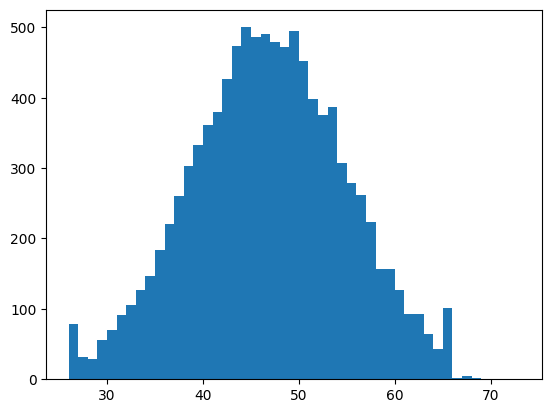

In [29]:
# Customer Demographics Analysis
#1 Age
l1 = []
for i in np.arange(np.min(df.Customer_Age), np.max(df.Customer_Age) + 1, 1):
    l1.append(i)

plt.hist(df.Customer_Age, bins=l1)
plt.show()

The histogram of the age gives us a symmetric curve with mean and median approximately the same.

In [30]:
print(np.mean(df.Customer_Age))
print(np.median(df.Customer_Age))

46.32596030413745
46.0


#### Income
- The salary of each client is one of the factors that most impact the services provided by a credit card company to its customers. For this reason, I will choose to exclude records of clients whose income is not known, rather than estimating it, in order to segment them more effectively.

In [31]:
# Checking values of Income_Category 
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [32]:
# Drop values "Unknown."
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

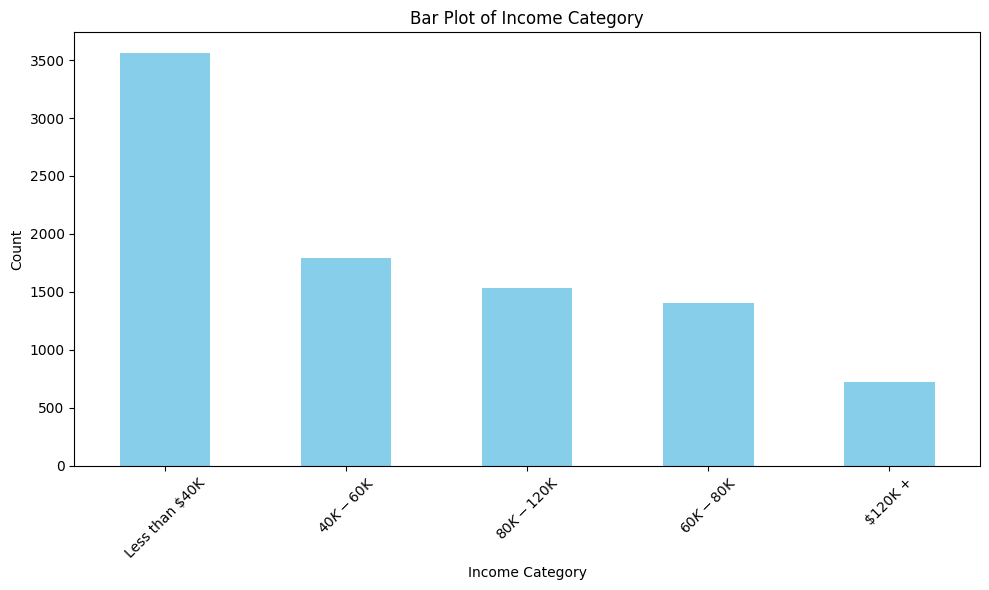

In [36]:
# Create a bar plot
plt.figure(figsize=(10, 6))
income_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### Marital status


In [37]:
#Check Marital_Status values
df['Marital_Status'].value_counts()

Marital_Status
Married     4194
Single      3499
Unknown      667
Divorced     655
Name: count, dtype: int64

- Unknown' values can incomplete or unreliable data for analysis, So I choose to exclude them and only keep rows with 'Married', 'Single', and 'Divorced' statuses.

In [38]:
df = df[df['Marital_Status'] != 'Unknown']

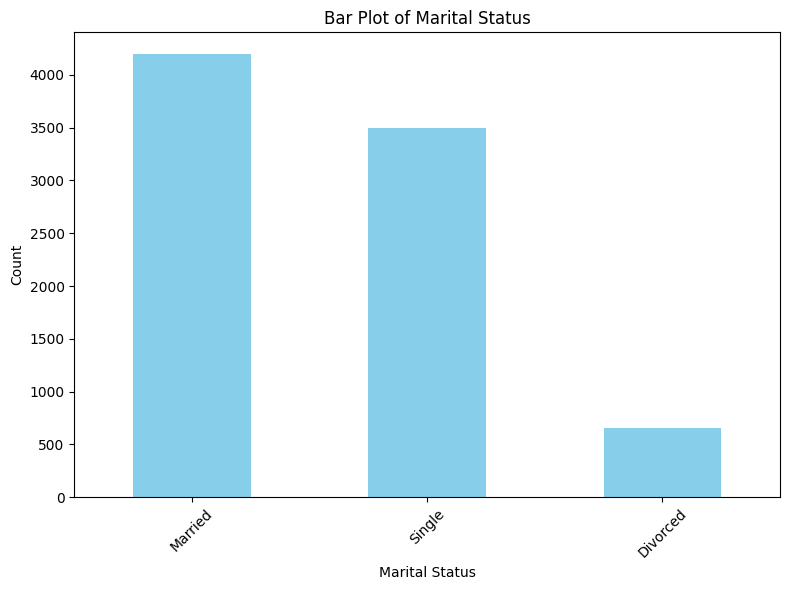

In [41]:
# Create a bar plot
plt.figure(figsize=(8, 6))
df['Marital_Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Credit Usage Analysis
- I will plot a heatmap to show coorelation between the credit card limit, balance, and category and others.

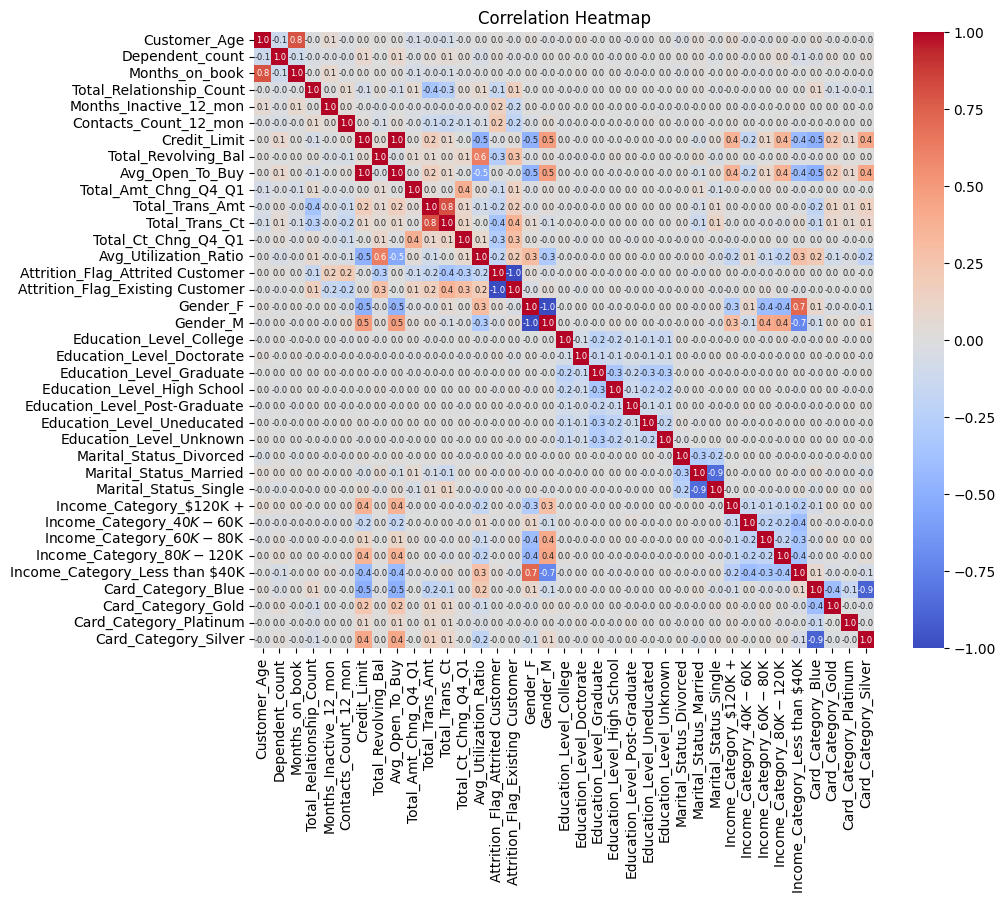

In [44]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap="coolwarm", fmt=".1f", annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

- The features Credit_Limit and Avg_Open_To_Buy have a correlation of 1.0, indicating perfect correlation, so it would be redundant to keep both variables. I will choose to retain only the Credit_Limit.

In [45]:
# Dropping "Avg_Open_To_Buy" column
df = df.drop(columns=['Avg_Open_To_Buy'])

## Customer Segmentation 
- To implement the  K-means algorithm we have to preprocess the Data. The feature scaling step is crucial, as K-means clustering is sensitive to the scale of features. It ensures that all features contribute equally to the clustering process, preventing variables with larger scales from dominating the analysis.

In [46]:
one_hot_cols = [
    "Gender", 
    "Education_Level", 
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag",
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book"
]

power_cols = [
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
]

minmax_cols = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal",
]

In [49]:
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

preprocessing.fit_transform(df)

array([[ 0.        ,  1.        ,  0.        , ..., -0.02000799,
         0.99624954, -0.7921627 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.06107232,
         0.61010243, -0.53040294],
       [ 0.        ,  1.        ,  0.        , ..., -1.6801963 ,
        -0.36941358, -1.20786574],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.9497864 ,
        -0.09362383,  0.9750414 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.6801963 ,
         0.17478148, -1.20786574],
       [ 1.        ,  0.        ,  0.        , ...,  0.82684472,
         0.8230086 , -0.10222285]])

In [50]:
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

one-hot__Gender_F  one-hot__Gender_M  one-hot__Education_Level_College  \
0                0.0                1.0                               0.0   
1                1.0                0.0                               0.0   
2                0.0                1.0                               0.0   
3                0.0                1.0                               0.0   
4                0.0                1.0                               0.0   

   one-hot__Education_Level_Doctorate  one-hot__Education_Level_Graduate  \
0                                 0.0                                0.0   
1                                 0.0                                1.0   
2                                 0.0                                1.0   
3                                 0.0                                0.0   
4                                 0.0                                1.0   

   one-hot__Education_Level_High School  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   one-hot__Education_Level_Post-Graduate  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   one-hot__Education_Level_Uneducated  one-hot__Education_Level_Unknown  \
0                                  0.0                               0.0   
1                                  0.0                               0.0   
2                                  0.0                               0.0   
3                                  1.0                               0.0   
4                                  0.0                               0.0   

   one-hot__Marital_Status_Divorced  ...  standard__Customer_Age  \
0                               0.0  ...               -0.171901   
1                               0.0  ...                0.326849   
2                               0.0  ...                0.576224   
3                               0.0  ...               -0.795338   
4                               0.0  ...               -0.296588   

   standard__Total_Amt_Chng_Q4_Q1  standard__Total_Ct_Chng_Q4_Q1  \
0                        2.593541                       3.838032   
1                        3.523002                      12.612984   
2                        8.274084                       6.812022   
3                        6.383577                       7.513514   
4                        2.778531                       0.565802   

   standard__Months_on_book  minmax__Total_Trans_Amt  minmax__Total_Trans_Ct  \
0                  0.377262                 0.035273                0.248062   
1                  1.003531                 0.043452                0.178295   
2                  0.001500                 0.076611                0.077519   
3                 -1.877307                 0.017025                0.139535   
4                  0.001500                 0.032158                0.108527   

   minmax__Total_Revolving_Bal  power__Total_Revolving_Bal  \
0                     0.308701                   -0.020008   
1                     0.343266                    0.061072   
2                     0.000000                   -1.680196   
3                     0.000000                   -1.680196   
4                     0.495431                    0.371257   

   power__Credit_Limit  power__Avg_Utilization_Ratio  
0             0.996250                     -0.792163  
1             0.610102                     -0.530403  
2            -0.369414                     -1.207866  
3             0.020519                     -1.207866  
4            -0.170903                      0.390891  

[5 rows x 59 columns]

In [51]:
# Filtering only numeric columns for comparison.
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith("one")]
scaled_columns_not_one_hot

Index(['standard__Customer_Age', 'standard__Total_Amt_Chng_Q4_Q1',
       'standard__Total_Ct_Chng_Q4_Q1', 'standard__Months_on_book',
       'minmax__Total_Trans_Amt', 'minmax__Total_Trans_Ct',
       'minmax__Total_Revolving_Bal', 'power__Total_Revolving_Bal',
       'power__Credit_Limit', 'power__Avg_Utilization_Ratio'],
      dtype='object')

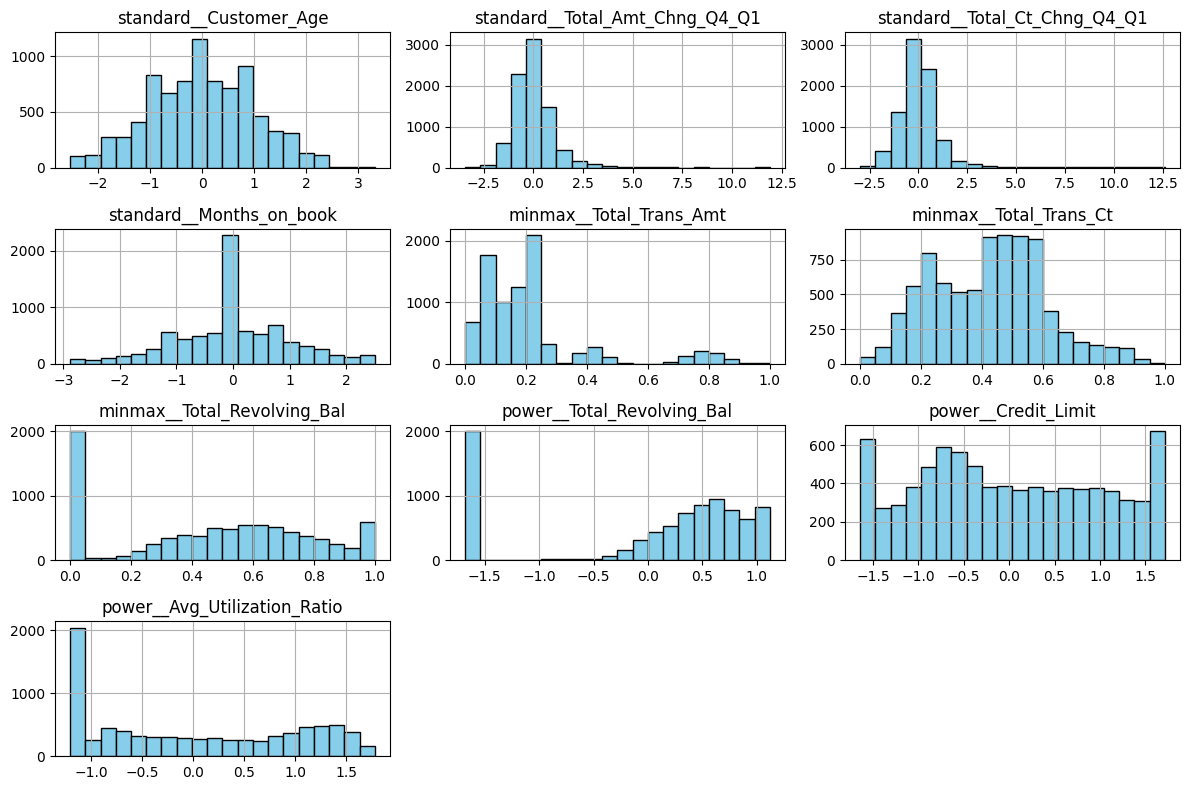

In [55]:
# Selecting features
data_to_plot = df_scaled[scaled_columns_not_one_hot]

data_to_plot.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### To find the best number of clusters for our data, I'll use two common methods:

 - Elbow Method: I'll plot how the total distance of data points to their assigned clusters changes as we increase the number of clusters. The "elbow" point on the graph suggests the ideal number of clusters, where adding more clusters doesn't significantly reduce the distance.

 - Silhouette Method: I'll calculate how well each data point fits into its assigned cluster compared to other clusters. The average silhouette score measures how similar a point is to its own cluster compared to other clusters. A higher score suggests better-defined clusters. We'll pick the number of clusters with the highest silhouette score.

By combining these methods, we can find the best number of clusters that effectively capture the patterns in our data. 

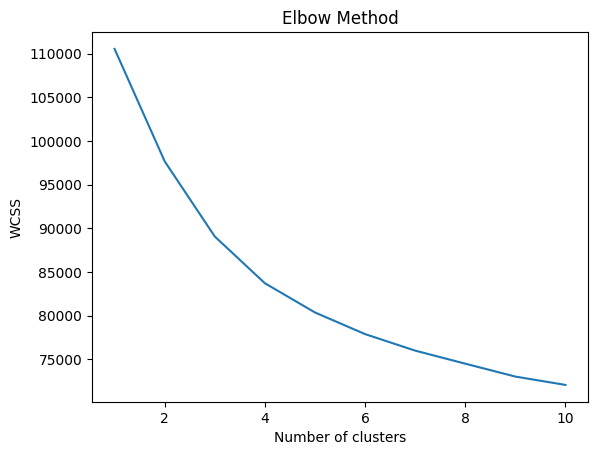

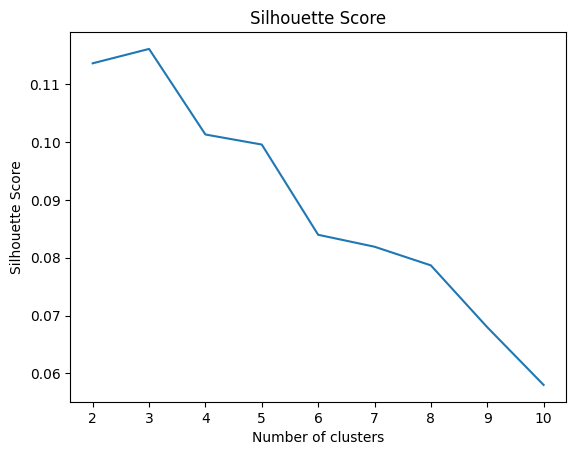

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Silhouette Score to validate clustering quality
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- In the Elbow method graph, we observe it pointing to a number of 3 clusters. Considering that the value of 3 clusters has the best score in the Silhouette method, based on these two indicators, I will define the number of clusters as 3.

## PCA
- Given the high dimensionality of our DataFrame, consisting of 19 columns, I will apply PCA (Principal Component Analysis) to reduce its dimensionality to 2, aiming to simplify the visualization and interpretation of the data in 2D plo

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Attrition_Flag']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal']),
                                                 ('power', PowerTransformer(),
                                                  ['Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio'])])),
                ('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [60]:
# New df with "Cluster" column
df_clustered = df.copy()
df_clustered["Cluster"] = pipeline["clustering"].labels_

df_clustered.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
4  Existing Customer            40      M                3      Uneducated   
5  Existing Customer            44      M                2        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
4        Married     $60K - $80K          Blue              21   
5        Married     $40K - $60K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
4                         5                       1                      0   
5                         3                       1                      2   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0       12691.0                  777                 1.335             1144   
1        8256.0                  864                 1.541             1291   
2        3418.0                    0                 2.594             1887   
4        4716.0                    0                 2.175              816   
5        4010.0                 1247                 1.376             1088   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Cluster  
0              42                1.625                  0.061        1  
1              33                3.714                  0.105        1  
2              20                2.333                  0.000        1  
4              28                2.500                  0.000        1  
5              24                0.846                  0.311        1

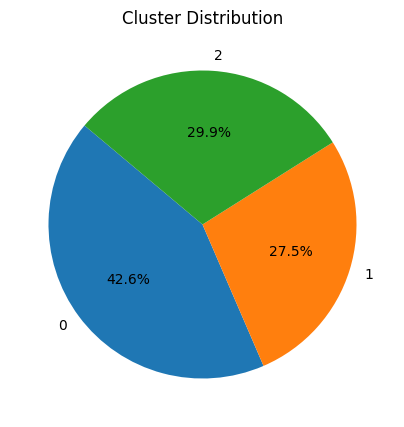

In [63]:
# Count of each cluster
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

# Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Cluster Distribution')
plt.show()

In [64]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

pca0      pca1
0 -0.007551  0.697223
1  2.423725  0.709541
2  0.571754  1.560331
3  0.461902  3.626071
4  0.934351  0.614139

In [65]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[-1.37367617,  0.03254029],
       [ 1.03662438,  1.26010216],
       [ 1.00830371, -1.20402009]])

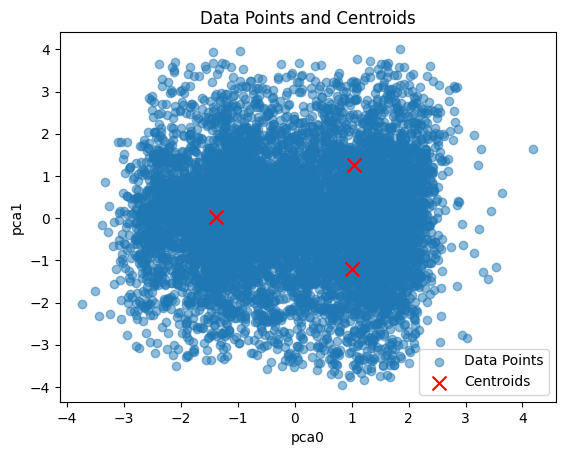

In [67]:
#Ploting Centroids
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], alpha=0.5, label='Data Points')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.xlabel(df_pca.columns[0])
plt.ylabel(df_pca.columns[1])
plt.title('Data Points and Centroids')
plt.legend()
plt.show()

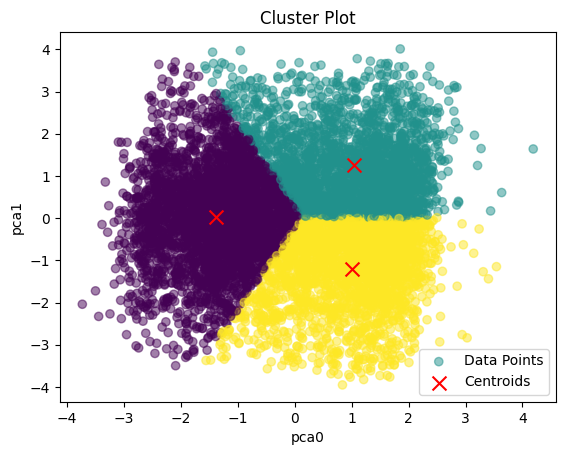

In [68]:
def plot_clusters_2D(dataframe, columns, n_colors, centroids, show_points=True, column_clusters=None):
    # Plot data points
    if show_points:
        if column_clusters is not None:
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=column_clusters, cmap='viridis', alpha=0.5, label='Data Points')
        else:
            plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], alpha=0.5, label='Data Points')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
    
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title('Cluster Plot')
    plt.legend()
    plt.show()


plot_clusters_2D(dataframe=df_pca, columns=df_pca.columns, n_colors=3, centroids=centroids, show_points=True, column_clusters=df_clustered["Cluster"])

## Cluster Analysis
- Explore both the numerical and categorical columns, examining the characteristics of each cluster to draw the profile of customers within each group.

### Numerical Columns

- I will select the main numerical columns and these will be plotted together using pairplots and boxplots.

In [69]:
# Defining columns for analysis
columns_analysis = [
    "Customer_Age",
    "Months_on_book",
    "Total_Trans_Amt",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Revolving_Bal"
]

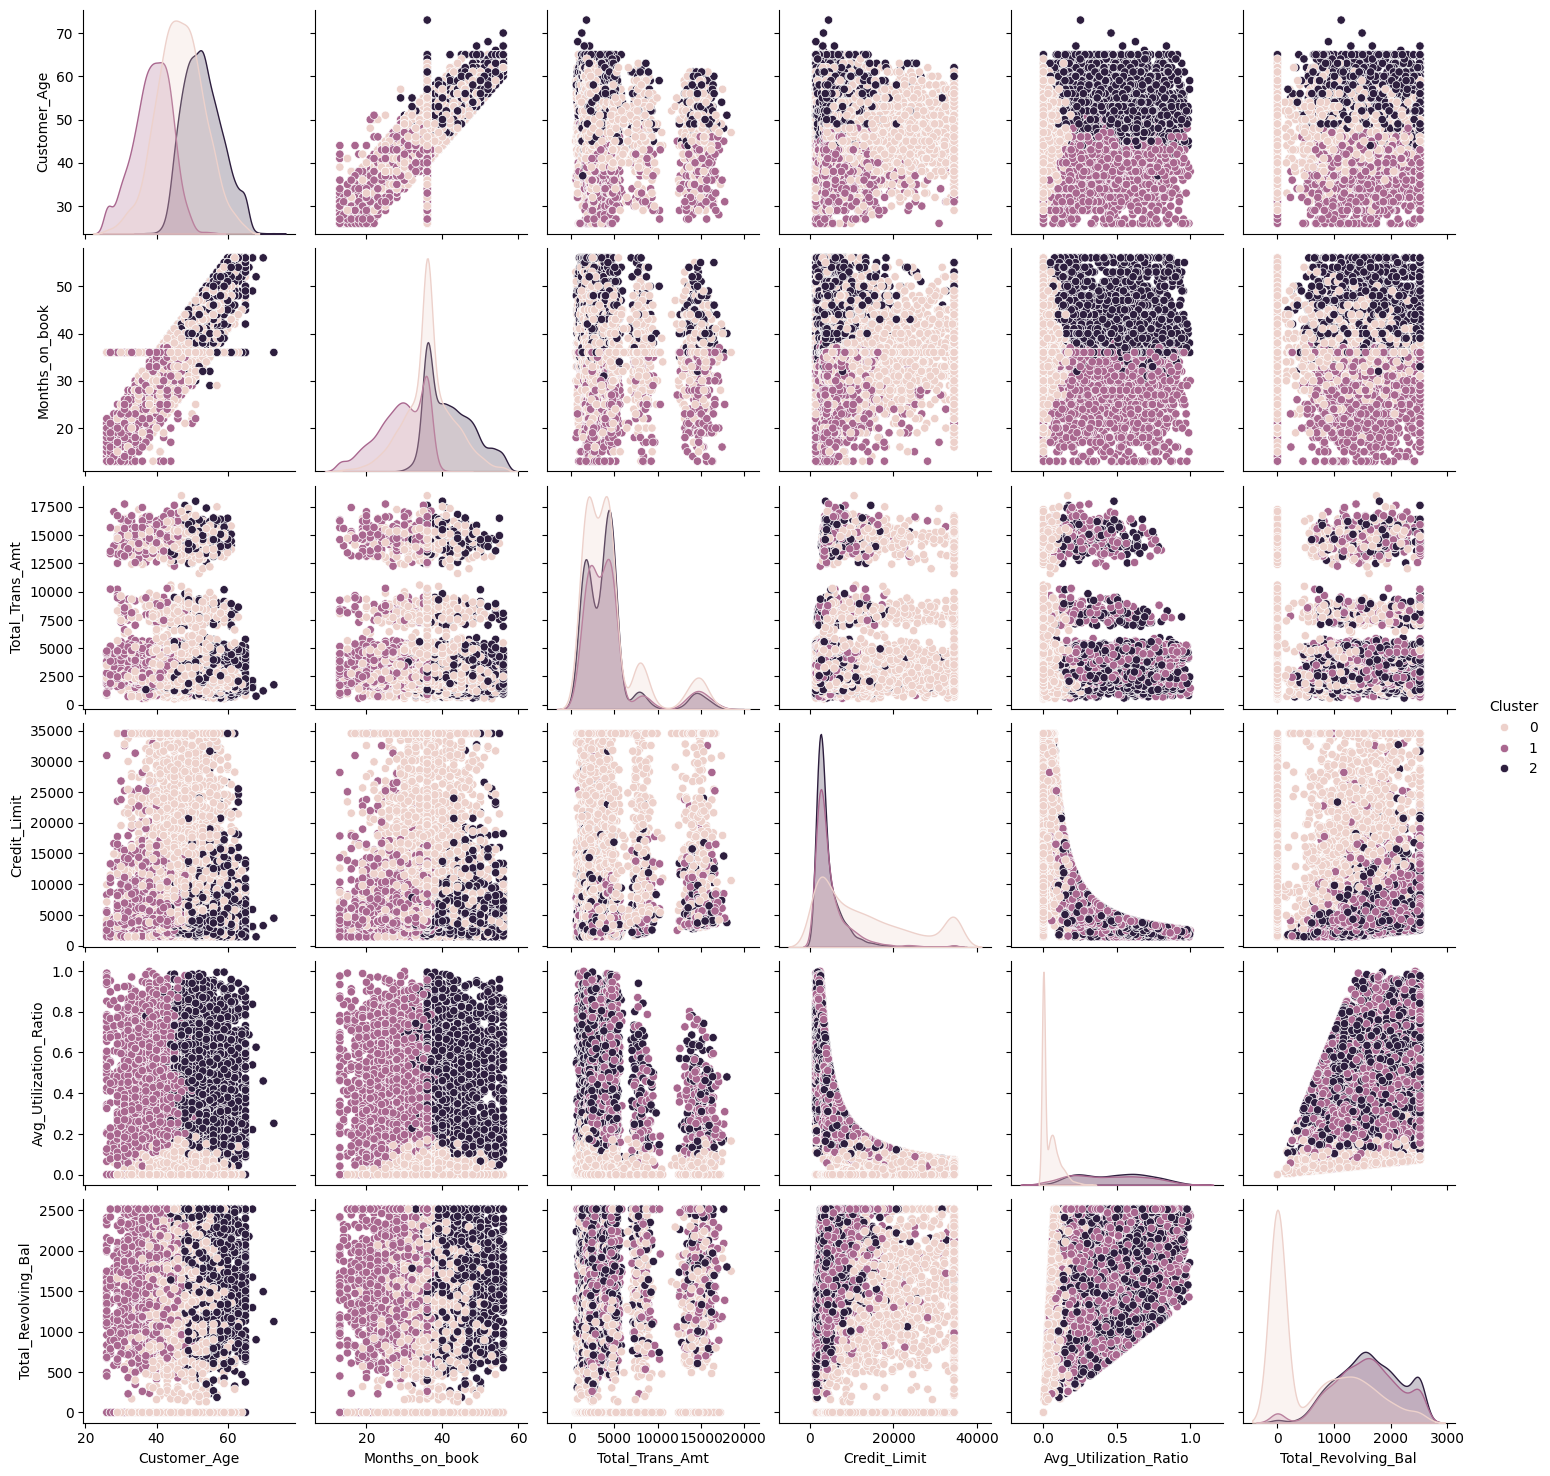

In [76]:
#Pair plot of the analyzed columns
sns.pairplot(df_clustered, vars=columns_analysis, hue="Cluster")
plt.show()

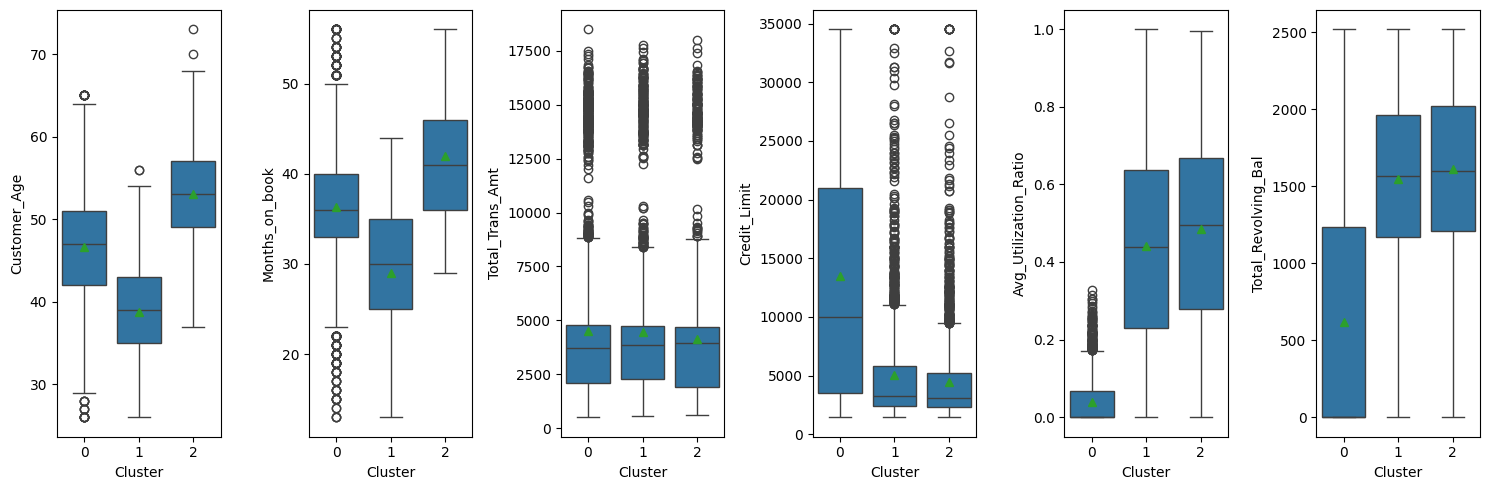

In [78]:
#Box plot of the analyzed columns
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="Cluster", y=col, data=df_clustered, ax=ax, showmeans=True)

- In both the pair plot and the box plot, we notice a strong connection between customer age and their tenure with the bank. Cluster 0 comprises older customers with longer bank relationships, while cluster 2 consists of younger customers with shorter tenure. Cluster 1 shows a mix of ages, mostly falling between the medians of clusters 0 and 2, indicating an intermediate age and relationship duration compared to the other clusters. This pattern extends to the duration of the relationship that cluster 1 customers maintain with the bank.

- Regarding total transaction amount, there's little variation across the three clusters, making it difficult to distinguish between them significantly.

- When considering credit limit and average utilization ratio, cluster 1 stands out with a higher credit limit compared to clusters 0 and 2. Despite similar spending patterns observed in the total transaction amount, customers in clusters 0 and 2 exhibit a higher credit utilization ratio due to their lower credit limits. Conversely, customers in cluster 1 have a lower credit utilization ratio due to their higher credit limit.

- In terms of total revolving balance, customers in clusters 0 and 2 carry more outstanding debts on their credit cards compared to those in cluster 1.

### Categorical Columns

- I'll plot some categorical features that I considered important.

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_columns_percent_by_cluster(dataframe, columns, figsize, palette, order=None):
    # Calculate percentage distribution
    df_percent = dataframe.groupby(["Cluster", columns[0]]).size().unstack()
    df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100
    
    # Reorder if specified
    if order:
        df_percent = df_percent[order]
    
    # Plot
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    df_percent.plot(kind='bar', stacked=True, color=palette)
    plt.title('Income Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.legend(title=columns[0])
    plt.tight_layout()
    plt.show()




In [120]:
order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +"][::-1]


<Figure size 800x500 with 0 Axes>

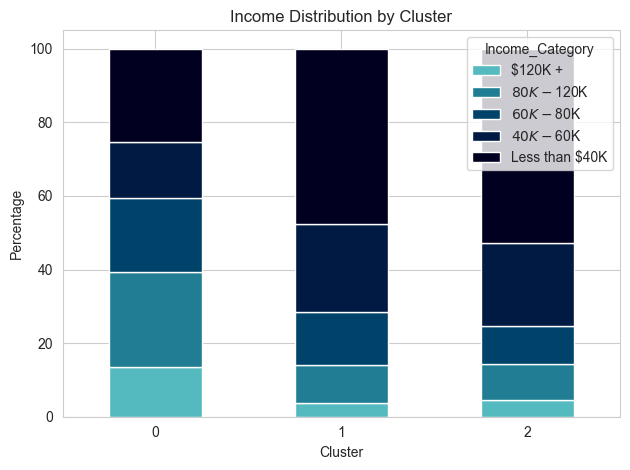

In [123]:
plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=["Income_Category"],
    figsize=(8, 5),
    palette=['#55babf', '#207d93', '#00436a', '#001a43', '#010020'],
    order=order
)

<Figure size 800x500 with 0 Axes>

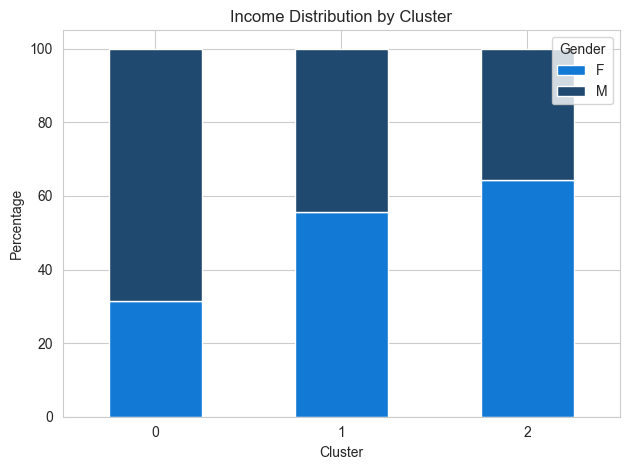

In [127]:
plot_columns_percent_by_cluster(
    dataframe=df_clustered,
    columns=["Gender"],
    figsize=(8, 5),
    palette=['#127AD5', '#1F496E']
)

<Figure size 900x500 with 0 Axes>

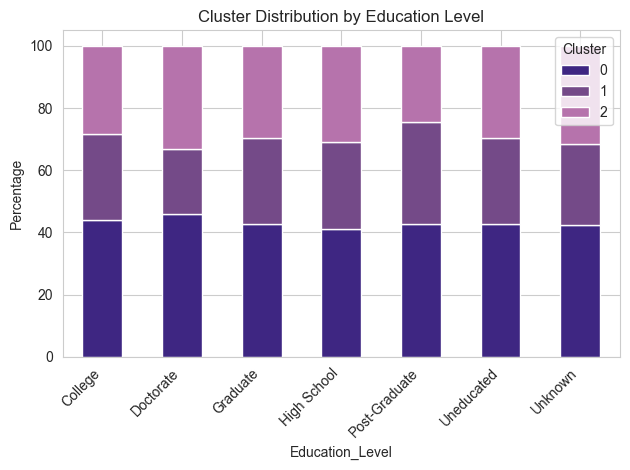

In [138]:
def plot_columns_percent_hue_cluster(dataframe, columns, figsize, palette):
    # Calculate percentage distribution
    df_percent = dataframe.groupby([columns[0], "Cluster"]).size().unstack()
    df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100
    
    # Plot
    sns.set_style("whitegrid")
    plt.figure(figsize=figsize)
    df_percent.plot(kind='bar', stacked=True, color=palette)
    plt.title('Cluster Distribution by Education Level')
    plt.xlabel(columns[0])
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Example usage
plot_columns_percent_hue_cluster(
    dataframe=df_clustered,
    columns=["Education_Level"],
    figsize=(9, 5),
    palette=['#3E2682','#744A88','#B673AC']
)


## Churn Model Prediction

In [140]:
x = df.drop(columns='Attrition_Flag')
y = df.Attrition_Flag

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69, stratify=y)

In [142]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6678 entries, 1156 to 9136
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6678 non-null   int64  
 1   Gender                    6678 non-null   object 
 2   Dependent_count           6678 non-null   int64  
 3   Education_Level           6678 non-null   object 
 4   Marital_Status            6678 non-null   object 
 5   Income_Category           6678 non-null   object 
 6   Card_Category             6678 non-null   object 
 7   Months_on_book            6678 non-null   int64  
 8   Total_Relationship_Count  6678 non-null   int64  
 9   Months_Inactive_12_mon    6678 non-null   int64  
 10  Contacts_Count_12_mon     6678 non-null   int64  
 11  Credit_Limit              6678 non-null   float64
 12  Total_Revolving_Bal       6678 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      6678 non-null   float64
 14  Total_Tran

### Feature-Encoding
Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data. There are multiple ways of handling Categorical variables. The two most widely used techniques:

1. Label Encoding
2. One-Hot Encoding
   
### Label Encoding

- A unique integer represents each value of the categorical variable. Issue with label encoding is that it can imply an unintended order to the variable. So, we use it only for ordinal variables of our dataset.

### One-Hot Encoding

- It simply creates additional features called dummy variables based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. Issue with one-hot encoding is the Dummy Variable Trap - a scenario in which variables are highly correlated to each other - multicollinearity. So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. We use one-hot encoding for nominal variables of our dataset.

In [143]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train.value_counts()

Attrition_Flag
Existing Customer    5616
Attrited Customer    1062
Name: count, dtype: int64

Attrition_Flag is the target varibale so we just use replacement when encoding

In [144]:
y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})

y_train.value_counts()

C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\2866119147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Existing Customer':0, 'Attrited Customer':1})
C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\2866119147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Existing Customer':0, 'Attrited Customer':1})


Attrition_Flag
0    5616
1    1062
Name: count, dtype: int64

In [145]:
x_train.Gender.value_counts()

Gender
M    3488
F    3190
Name: count, dtype: int64

In [146]:
x_train.Marital_Status.value_counts()

Marital_Status
Married     3350
Single      2818
Divorced     510
Name: count, dtype: int64

In [147]:
df1 = pd.get_dummies(x_train.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_train = pd.concat([x_train, df1], axis=1)
x_train = x_train.drop(columns={'Gender','Marital_Status'})

In [148]:
df2 = pd.get_dummies(x_test.loc[:, ['Gender','Marital_Status']], prefix=['Gender','Marital_Status'], drop_first=True)
x_test = pd.concat([x_test, df2], axis=1)
x_test = x_test.drop(columns={'Gender','Marital_Status'})

In [149]:
x_train.Education_Level.value_counts()

Education_Level
Graduate         2082
High School      1326
Unknown          1005
Uneducated        974
College           676
Post-Graduate     334
Doctorate         281
Name: count, dtype: int64

In [150]:
x_train.Income_Category.value_counts()

Income_Category
Less than $40K    2653
$40K - $60K       1329
$80K - $120K      1113
$60K - $80K       1040
$120K +            543
Name: count, dtype: int64

In [151]:
x_train.Card_Category.value_counts()

Card_Category
Blue        6231
Silver       354
Gold          80
Platinum      13
Name: count, dtype: int64

In [152]:
x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_train.Card_Category = x_train.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_train = x_train.reset_index(drop=True)

C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\48831308.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train.Education_Level = x_train.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\48831308.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train.Income_Category = x_train.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $12

In [153]:
x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $120K':100000, '$120K +':140000})
x_test.Card_Category = x_test.Card_Category.replace({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})
x_test = x_test.reset_index(drop=True)

C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\3158282164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test.Education_Level = x_test.Education_Level.replace({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})
C:\Users\Ansh\AppData\Local\Temp\ipykernel_23488\3158282164.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test.Income_Category = x_test.Income_Category.replace({'Unknown':0, 'Less than $40K':20000, '$40K - $60K':50000, '$60K - $80K':70000, '$80K - $12

In [154]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6678 non-null   int64  
 1   Dependent_count           6678 non-null   int64  
 2   Education_Level           6678 non-null   int64  
 3   Income_Category           6678 non-null   int64  
 4   Card_Category             6678 non-null   int64  
 5   Months_on_book            6678 non-null   int64  
 6   Total_Relationship_Count  6678 non-null   int64  
 7   Months_Inactive_12_mon    6678 non-null   int64  
 8   Contacts_Count_12_mon     6678 non-null   int64  
 9   Credit_Limit              6678 non-null   float64
 10  Total_Revolving_Bal       6678 non-null   int64  
 11  Total_Amt_Chng_Q4_Q1      6678 non-null   float64
 12  Total_Trans_Amt           6678 non-null   int64  
 13  Total_Trans_Ct            6678 non-null   int64  
 14  Total_Ct

### Feature-Reduction

- Feature reduction techniques can help in identifying and retaining only the most informative features, reducing redundancy. We use different techniques based on the type of the features.

- Continuous features with multi-collinearity - Principal Component Analysis (PCA)
Discrete or Categorical features - SelectKBest

Extracting Numerical Continuous Variables

In [158]:
x_train_cont = x_train.loc[:, ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]
x_test_cont = x_test.loc[:, ['Customer_Age','Months_on_book','Total_Revolving_Bal','Total_Trans_Amt','Months_Inactive_12_mon','Credit_Limit','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

Extracting Numerical Discrete Variables

In [159]:
x_train_disc = x_train.loc[:, ['Dependent_count','Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct']]
x_test_disc = x_test.loc[:, ['Dependent_count','Total_Relationship_Count','Contacts_Count_12_mon','Total_Trans_Ct']]

Extracting Categorical Variables (after encoding)


In [163]:
x_train_cat = x_train.loc[:, ['Education_Level','Income_Category','Card_Category','Gender_M','Marital_Status_Married','Marital_Status_Single',
                      ]]
x_test_cat = x_test.loc[:, ['Education_Level','Income_Category','Card_Category','Gender_M','Marital_Status_Married','Marital_Status_Single',
                      ]]

Merging Numerical Variables

In [164]:
x_train_num = pd.concat([x_train_cont, x_train_disc], axis=1)

Method 1 - Draw the Correlation Matrix to Check for Multi-Collinearity

In [165]:
corr_matrix_train = x_train_num.corr()
corr_matrix_train

Customer_Age  Months_on_book  Total_Revolving_Bal  \
Customer_Age                  1.000000        0.788150             0.017932   
Months_on_book                0.788150        1.000000             0.013031   
Total_Revolving_Bal           0.017932        0.013031             1.000000   
Total_Trans_Amt              -0.049764       -0.040510             0.060504   
Months_Inactive_12_mon        0.069161        0.079689            -0.043757   
Credit_Limit                  0.014484        0.016448             0.052642   
Total_Amt_Chng_Q4_Q1         -0.066118       -0.055798             0.054312   
Total_Ct_Chng_Q4_Q1          -0.004757       -0.019487             0.083256   
Avg_Utilization_Ratio         0.007848       -0.002091             0.626463   
Dependent_count              -0.119754       -0.105858            -0.009000   
Total_Relationship_Count     -0.012409       -0.009196             0.015769   
Contacts_Count_12_mon        -0.029948       -0.011808            -0.047486   
Total_Trans_Ct               -0.070166       -0.054398             0.046643   

                          Total_Trans_Amt  Months_Inactive_12_mon  \
Customer_Age                    -0.049764                0.069161   
Months_on_book                  -0.040510                0.079689   
Total_Revolving_Bal              0.060504               -0.043757   
Total_Trans_Amt                  1.000000               -0.039004   
Months_Inactive_12_mon          -0.039004                1.000000   
Credit_Limit                     0.173371               -0.020640   
Total_Amt_Chng_Q4_Q1             0.039122               -0.024255   
Total_Ct_Chng_Q4_Q1              0.092844               -0.034411   
Avg_Utilization_Ratio           -0.091130               -0.007608   
Dependent_count                  0.026097               -0.022969   
Total_Relationship_Count        -0.346669               -0.002043   
Contacts_Count_12_mon           -0.109169                0.023734   
Total_Trans_Ct                   0.809652               -0.050608   

                          Credit_Limit  Total_Amt_Chng_Q4_Q1  \
Customer_Age                  0.014484             -0.066118   
Months_on_book                0.016448             -0.055798   
Total_Revolving_Bal           0.052642              0.054312   
Total_Trans_Amt               0.173371              0.039122   
Months_Inactive_12_mon       -0.020640             -0.024255   
Credit_Limit                  1.000000              0.007477   
Total_Amt_Chng_Q4_Q1          0.007477              1.000000   
Total_Ct_Chng_Q4_Q1          -0.010022              0.383266   
Avg_Utilization_Ratio        -0.478268              0.040461   
Dependent_count               0.078899             -0.026714   
Total_Relationship_Count     -0.069755              0.052312   
Contacts_Count_12_mon         0.023154             -0.013297   
Total_Trans_Ct                0.078823              0.007130   

                          Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
Customer_Age                        -0.004757               0.007848   
Months_on_book                      -0.019487              -0.002091   
Total_Revolving_Bal                  0.083256               0.626463   
Total_Trans_Amt                      0.092844              -0.091130   
Months_Inactive_12_mon              -0.034411              -0.007608   
Credit_Limit                        -0.010022              -0.478268   
Total_Amt_Chng_Q4_Q1                 0.383266               0.040461   
Total_Ct_Chng_Q4_Q1                  1.000000               0.078341   
Avg_Utilization_Ratio                0.078341               1.000000   
Dependent_count                      0.020176              -0.051349   
Total_Relationship_Count             0.037073               0.068161   
Contacts_Count_12_mon               -0.098156              -0.052366   
Total_Trans_Ct                       0.121164              -0.005436   

                          Dependent_count  Tot

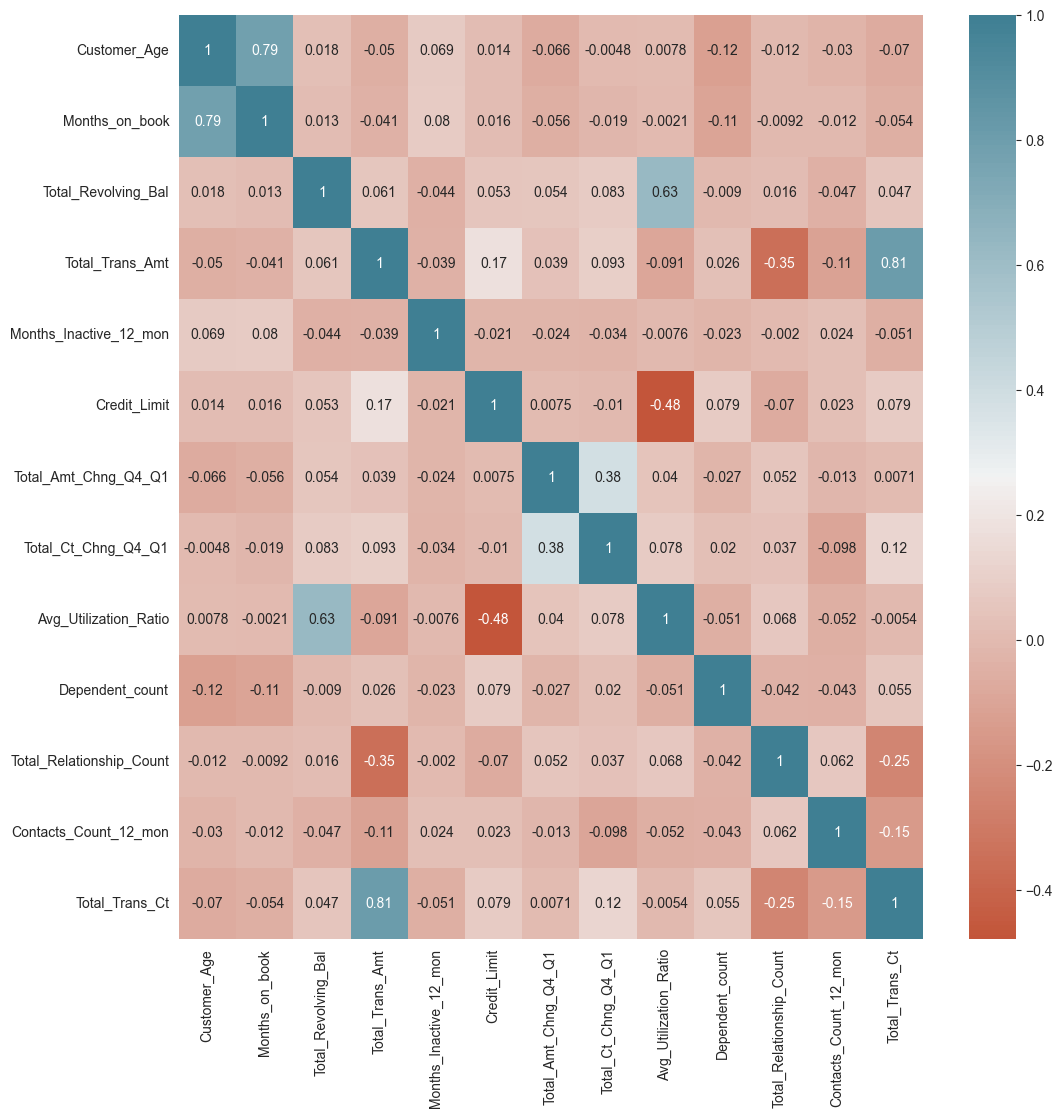

In [168]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix_train, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

Method 2 - Calculate Variance Inflation Factor (VIF) to Check for Multi-Collinearity

The variance inflation factor (VIF) is a measure used to assess multicollinearity in regression analysis. It is also calculated for numerical variables only. The general rule of thumb for interpreting VIF values is as follows:

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = x_train_num.columns
vif["VIF"] = [variance_inflation_factor(x_train_num.values, i) for i in range(x_train_num.shape[1])]
vif

Variable        VIF
0               Customer_Age  75.767429
1             Months_on_book  56.921214
2        Total_Revolving_Bal   6.984180
3            Total_Trans_Amt   8.546384
4     Months_Inactive_12_mon   6.221822
5               Credit_Limit   3.295376
6       Total_Amt_Chng_Q4_Q1  13.856059
7        Total_Ct_Chng_Q4_Q1  11.877981
8      Avg_Utilization_Ratio   5.989980
9            Dependent_count   4.086912
10  Total_Relationship_Count   7.513455
11     Contacts_Count_12_mon   5.493672
12            Total_Trans_Ct  22.875658

Both methods confirm that multi-collinearity exists in our dataset. So we need to perform PCA on the continuous variables.

#### Standardizing Continuous Variables before PCA

In [171]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_cont_std = std.fit_transform(x_train_cont)
x_test_cont_std = std.fit_transform(x_test_cont)

Choosing best number of Components for PCA

We plot explained variance ratio and choose a number of components that "capture" at least 95% of the variance of the original dataset

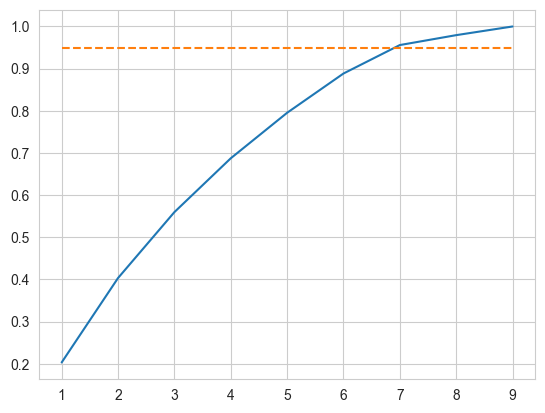

In [176]:
from sklearn.decomposition import PCA

# Assuming x_train_cont_std is your standardized continuous features
pca10 = PCA(n_components=9)
pca10.fit(x_train_cont_std)
x_train_cont_pca = pca10.transform(x_train_cont_std)

# Creating a list of 0.95s for the explained variance ratio
l2 = [0.95] * 9

# Plotting
plt.plot(np.arange(1, 10, 1), np.cumsum(pca10.explained_variance_ratio_))
plt.plot(np.arange(1, 10, 1), l2, ls='--')
plt.xticks(np.arange(1, 10, 1))
plt.show()

Based on the above graph, we select n_components = 7 to conudct our PCA

Conducting PCA on Standardized Continuous Variables

In [177]:
pca7_train = PCA(n_components=7)
pca7_train.fit(x_train_cont_std)
x_train_cont_pca = pca7_train.transform(x_train_cont_std)
x_train_pca = pd.DataFrame(x_train_cont_pca, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

In [178]:
pca7_test = PCA(n_components=7)
pca7_test.fit(x_test_cont_std)
x_test_cont_pca = pca7_test.transform(x_test_cont_std)
x_test_pca = pd.DataFrame(x_test_cont_pca, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7'])

Merging Discrete and Categorical Variables

In [179]:
x_train_non_cont = pd.concat([x_train_disc, x_train_cat], axis=1)
x_test_non_cont = pd.concat([x_test_disc, x_test_cat], axis=1)